NIDHI ANN ALEX


21BPS1009


ASSIGNMENT 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the Dataset

In [3]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

**DATA PROCESSING**

In [4]:
# Summary statistics of numeric columns
print(df.describe())



       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

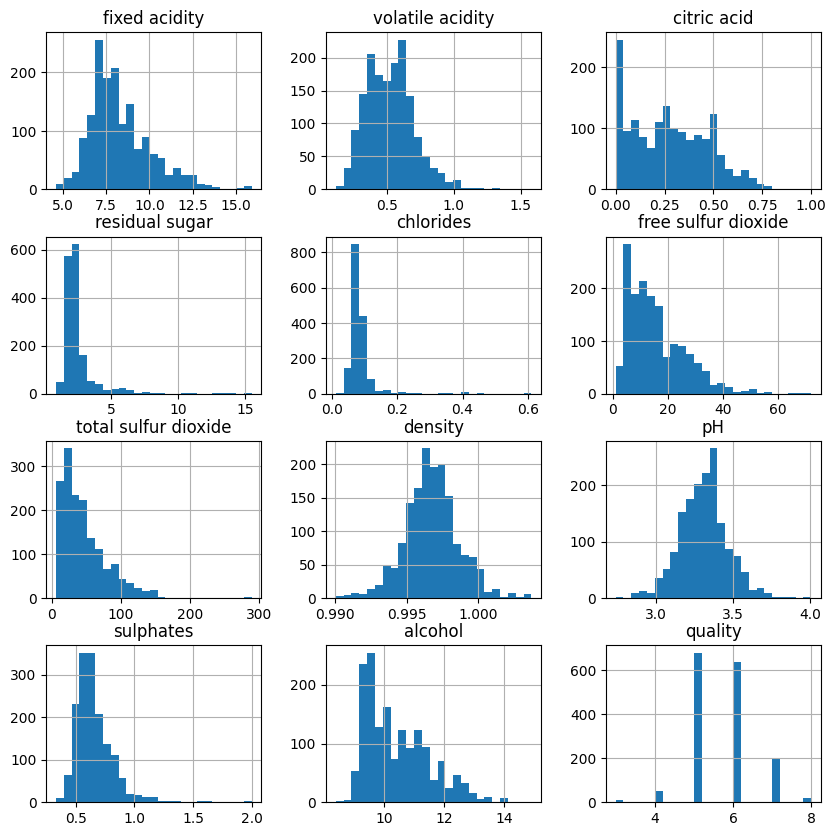

In [6]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

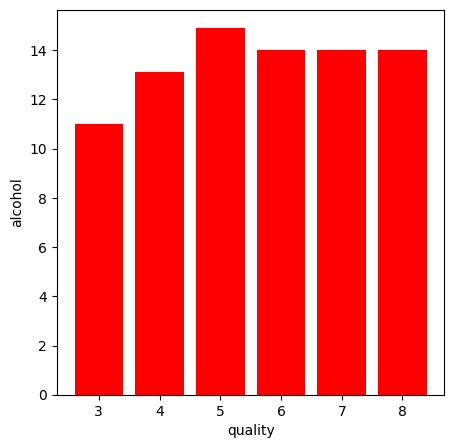

In [7]:
plt.figure(figsize=[5,5])
plt.bar(df['quality'],df['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

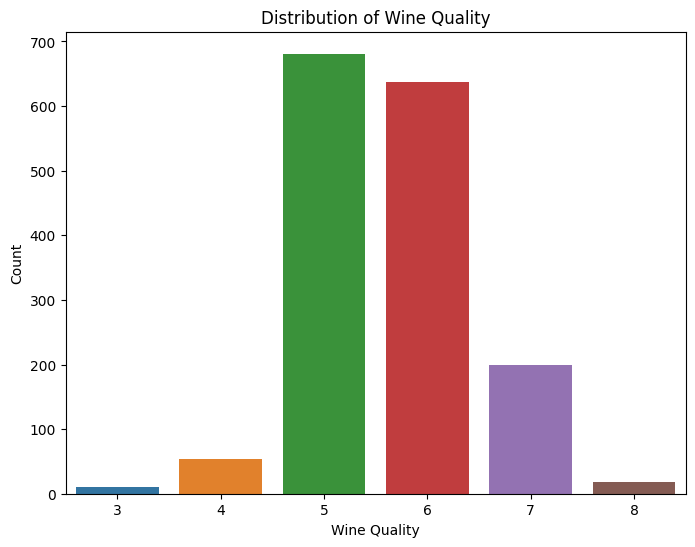

In [8]:
# Distribution of Wine Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()



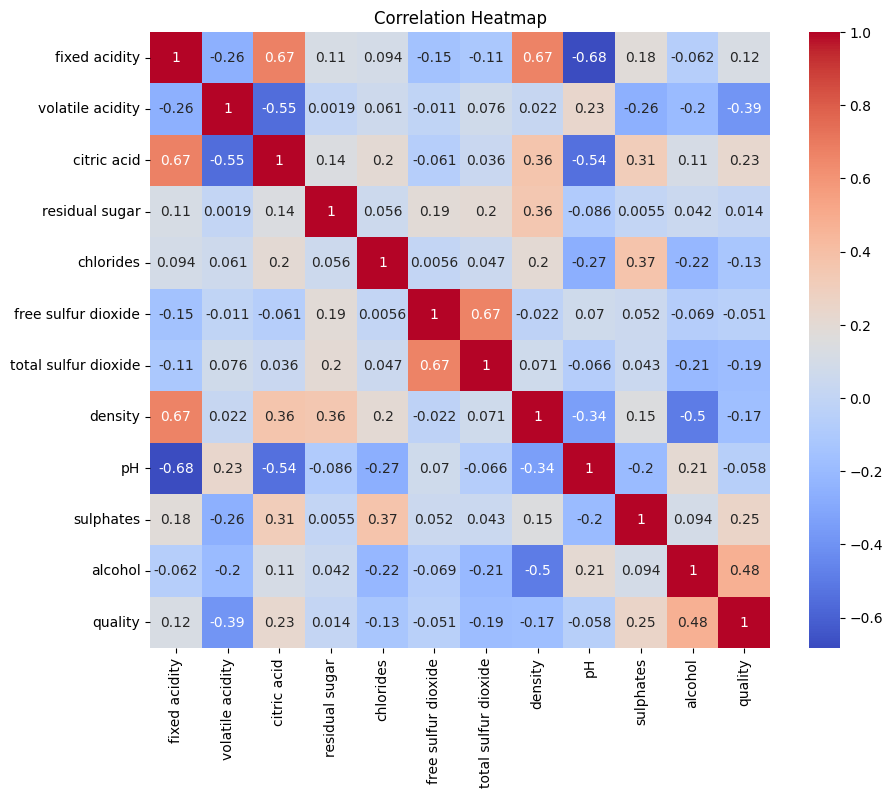

In [9]:
# Correlation heatmap (if applicable)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


univariate analysis

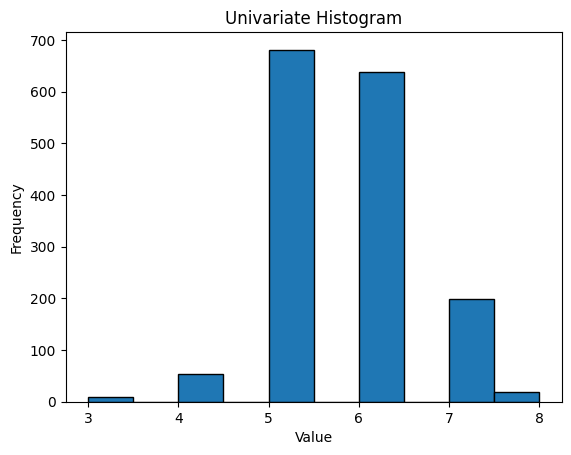

In [10]:
plt.hist(df['quality'], bins=10, edgecolor='k')  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Univariate Histogram')

# Show the plot
plt.show()

In [11]:
df["best quality"] = [ 1 if x>=6 else 0 for x in df.quality]
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [12]:
df.drop('quality',axis=1,inplace=True)

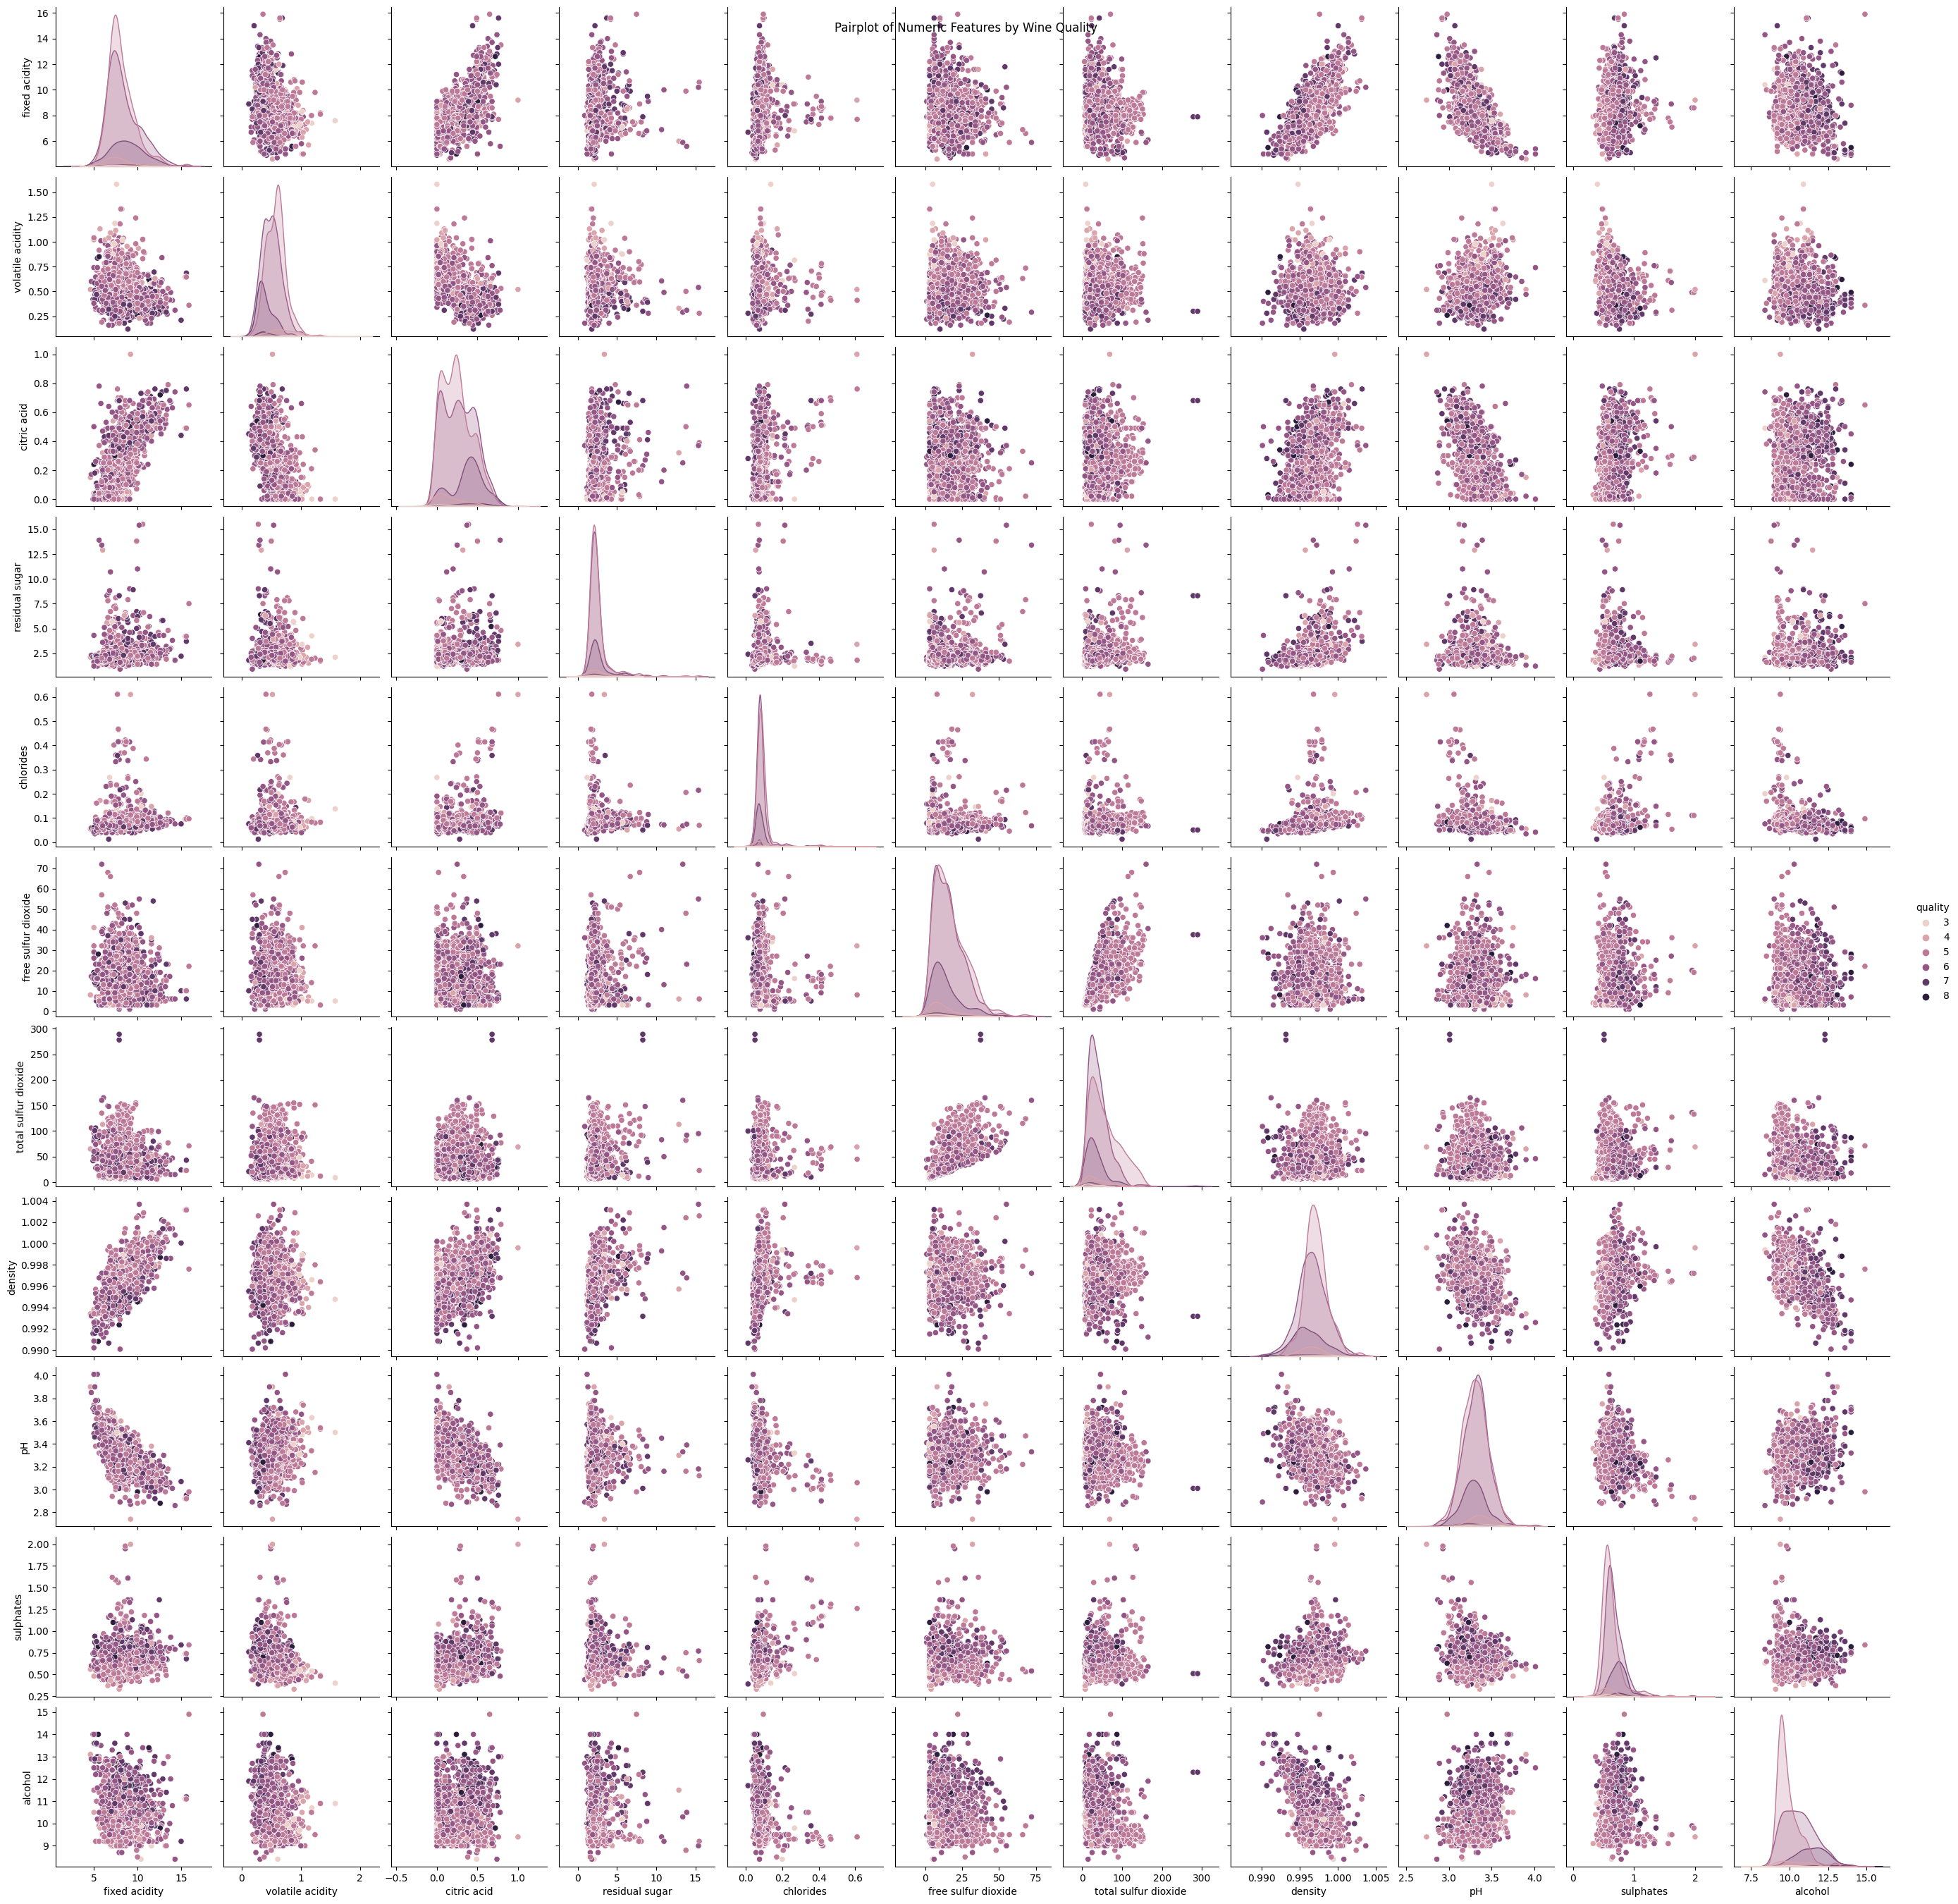

In [7]:
# Pairplot (scatterplot matrix) for numeric features
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                    'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
sns.pairplot(df, vars=numeric_features, hue='quality')
plt.suptitle('Pairplot of Numeric Features by Wine Quality')
plt.show()

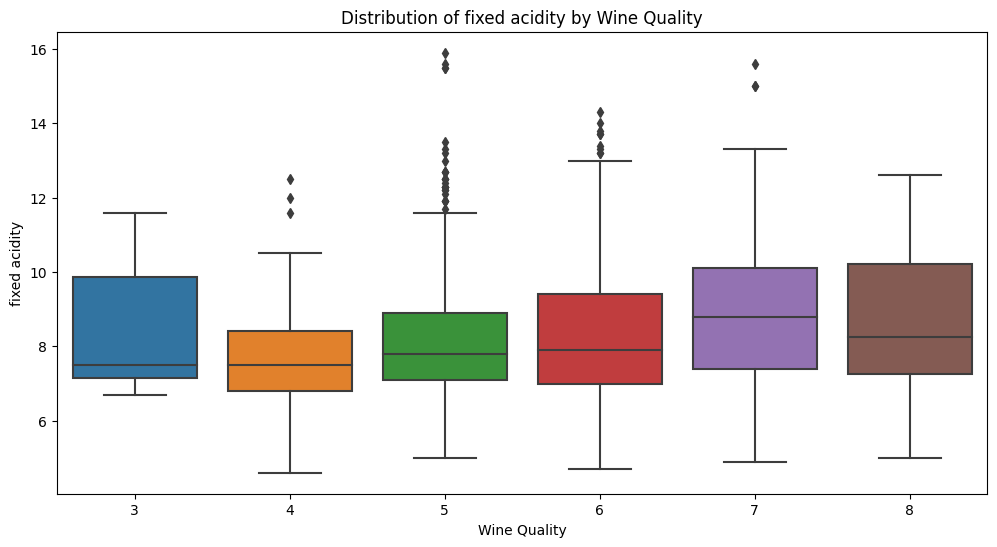

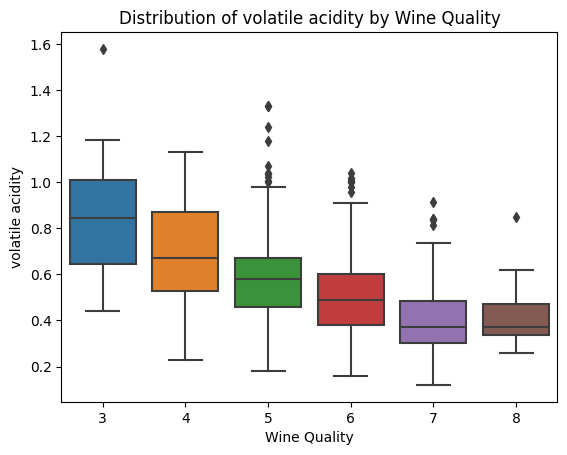

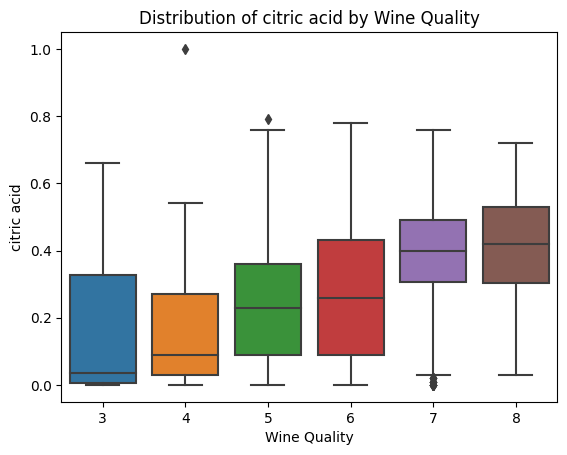

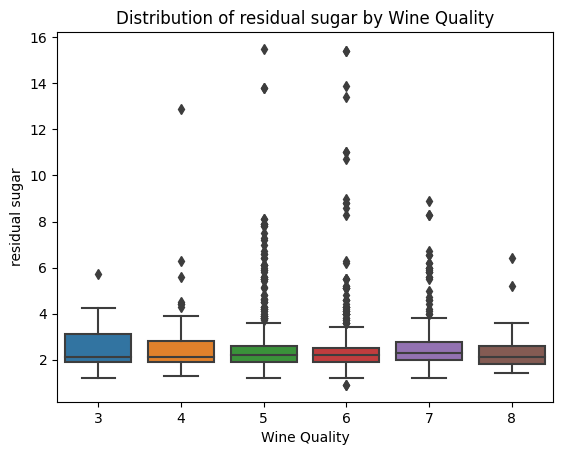

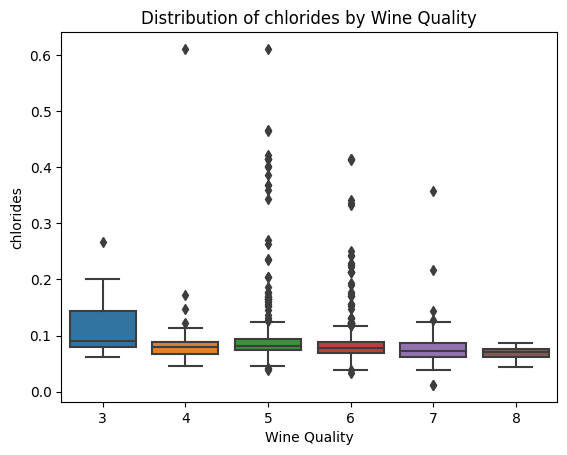

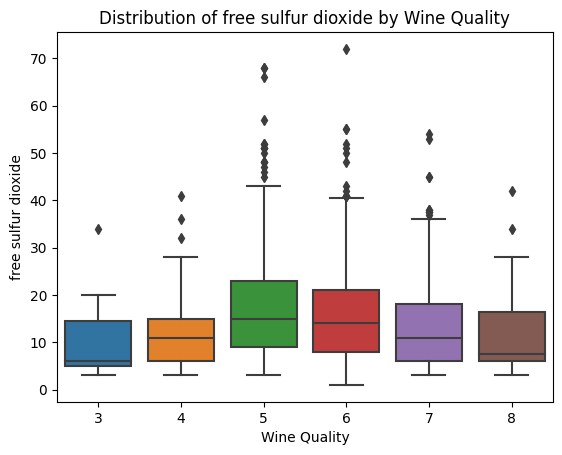

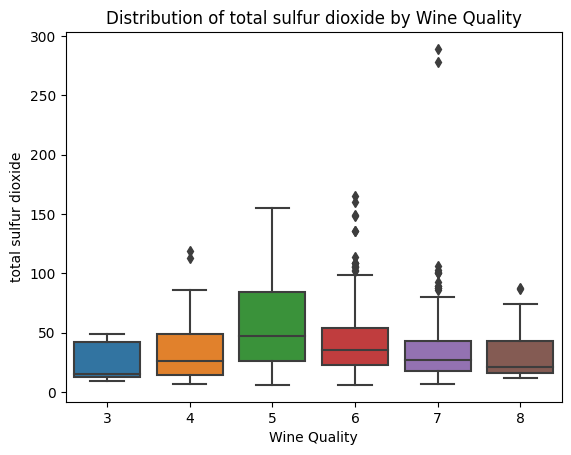

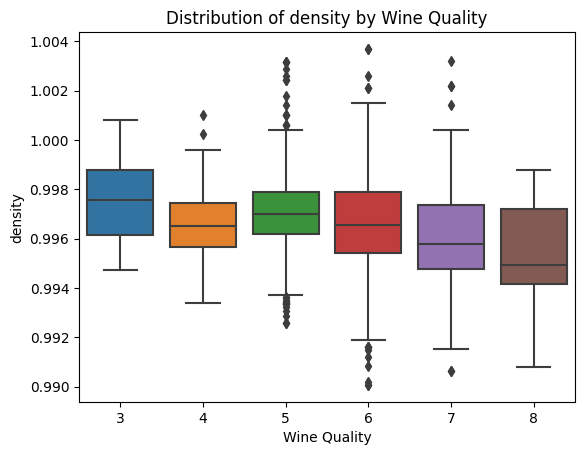

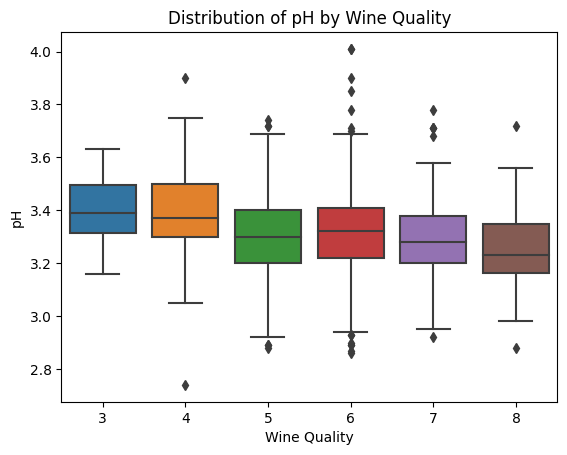

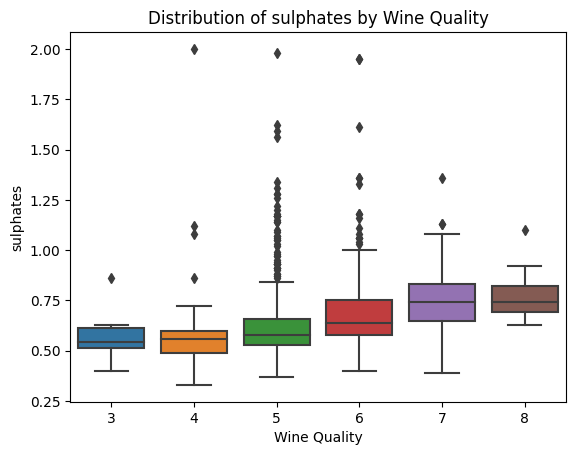

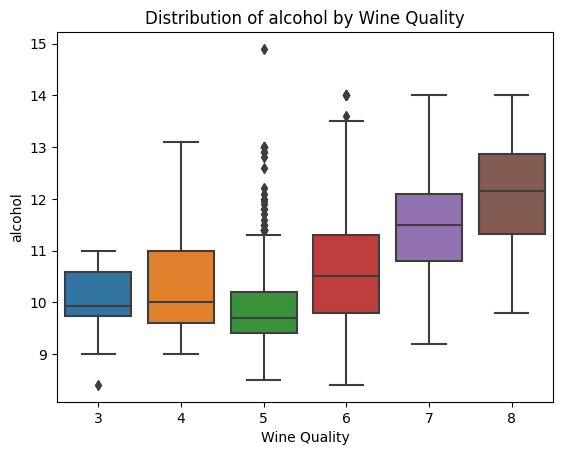

In [8]:
# Box plots to visualize distribution of numeric features by Wine Quality
plt.figure(figsize=(12, 6))
for feature in numeric_features:
    sns.boxplot(x='quality', y=feature, data=df)
    plt.xlabel('Wine Quality')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} by Wine Quality')
    plt.show()


data split

In [13]:
x = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target variable

x = x.to_numpy()
y = y.to_numpy()

In [14]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [15]:
y

array([0, 0, 0, ..., 1, 0, 1])

Handling missing data

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Impute missing values with the mean
for column in df.columns:
    if df[column].isnull().any():
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

# Check again for missing values to ensure they are handled
missing_values_after_imputation = df.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after_imputation)

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Missing Values After Imputation:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Data cleaning

In [10]:
# Check for and remove duplicate rows
duplicate_rows = df[df.duplicated()]
data = df.drop_duplicates()

# Handling outliers (replace 'column_name' with the appropriate column name)
column_name = 'fixed acidity'
lower_threshold = data[column_name].quantile(0.01)  # Adjust the threshold as needed
upper_threshold = data[column_name].quantile(0.99)  # Adjust the threshold as needed
data = data[(data[column_name] >= lower_threshold) & (data[column_name] <= upper_threshold)]

Encoding categorical variables

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# List of categorical columns (replace with your actual column names)
categorical_columns = ['categorical_column1', 'categorical_column2']

# Method 1: Label Encoding (for ordinal categorical variables)
label_encoder = LabelEncoder()
for column in categorical_columns:
    if column in data.columns:
        data[column] = label_encoder.fit_transform(data[column])

# Method 2: One-Hot Encoding (for nominal categorical variables)
column_name = 'nominal_categorical_column'
if column_name in data.columns:
    data = pd.get_dummies(data, columns=[column_name], prefix=[column_name])

Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# List of numeric columns
numeric_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'density', 'pH', 'sulphates', 'alcohol']

# Method 1: Standardization (Z-score scaling)
standard_scaler = StandardScaler()
for column in numeric_columns:
    if column in data.columns:
        data[column] = standard_scaler.fit_transform(data[column].values.reshape(-1, 1))

# Method 2: Min-Max Scaling (Normalization)
min_max_scaler = MinMaxScaler()
for column in numeric_columns:
    if column in data.columns:
        data[column] = min_max_scaler.fit_transform(data[column].values.reshape(-1, 1))


Feature Engineering

In [18]:
# Create a new feature by combining existing features
data['total_acidity'] = data['fixed acidity'] + data['volatile acidity']

# Example: Interaction features (e.g., product of two features)
data['interaction_feature'] = data['alcohol'] * data['sulphates']

In [19]:
# Example: Log transformation of a feature
import numpy as np
data['log_density'] = np.log(data['density'])


Data Splitting

In [17]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)


**MODEL TRAINING AND EVALUATION**

**Random forest**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [19]:
# Initialize and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=200,criterion='entropy')
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

In [20]:
# Evaluate the model's performance on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
report_train = classification_report(y_train, y_train_pred)
confusion_train = confusion_matrix(y_train, y_train_pred)

In [21]:
# Evaluate the model's performance on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)

In [117]:
print("Training Set Performance:")
print("Accuracy:", accuracy_train)
print("Classification Report:\n", report_train)
print("Confusion Matrix:\n", confusion_train)
print("\n")

print("Test Set Performance:")
print("Accuracy:", accuracy_test)
print("Classification Report:\n", report_test)
print("Confusion Matrix:\n", confusion_test)

Training Set Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        41
           5       1.00      1.00      1.00       458
           6       1.00      1.00      1.00       420
           7       1.00      1.00      1.00       128
           8       1.00      1.00      1.00        12

    accuracy                           1.00      1065
   macro avg       1.00      1.00      1.00      1065
weighted avg       1.00      1.00      1.00      1065

Confusion Matrix:
 [[  6   0   0   0   0   0]
 [  0  41   0   0   0   0]
 [  0   0 458   0   0   0]
 [  0   0   0 420   0   0]
 [  0   0   0   0 128   0]
 [  0   0   0   0   0  12]]


Test Set Performance:
Accuracy: 0.5767790262172284
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00  

**Desicion tree**

In [25]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model1.predict(X_train)

# Make predictions on the test set
y_test_pred = model1.predict(X_test)

In [26]:
# Evaluate the model's performance on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
report_train = classification_report(y_train, y_train_pred)
confusion_train = confusion_matrix(y_train, y_train_pred)

# Evaluate the model's performance on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)


In [27]:
print("Training Set Performance:")
print("Accuracy:", accuracy_train)
print("Classification Report:\n", report_train)
print("Confusion Matrix:\n", confusion_train)
print("\n")

print("Test Set Performance:")
print("Accuracy:", accuracy_test)
print("Classification Report:\n", report_test)
print("Confusion Matrix:\n", confusion_test)

Training Set Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       1.00      1.00      1.00       682

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279

Confusion Matrix:
 [[597   0]
 [  0 682]]


Test Set Performance:
Accuracy: 0.771875
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       147
           1       0.79      0.79      0.79       173

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320

Confusion Matrix:
 [[110  37]
 [ 36 137]]


**Logistic regression**

In [33]:

from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model2 = LogisticRegression(random_state=42, max_iter=1000)
model2.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model2.predict(X_train)

# Make predictions on the test set
y_test_pred = model2.predict(X_test)



In [34]:
# Evaluate the model's performance on training data
accuracy_train = accuracy_score(y_train, y_train_pred)
report_train = classification_report(y_train, y_train_pred)
confusion_train = confusion_matrix(y_train, y_train_pred)

# Evaluate the model's performance on test data
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)
confusion_test = confusion_matrix(y_test, y_test_pred)


In [35]:
print("Training Set Performance:")
print("Accuracy:", accuracy_train)
print("Classification Report:\n", report_train)
print("Confusion Matrix:\n", confusion_train)
print("\n")

print("Test Set Performance:")
print("Accuracy:", accuracy_test)
print("Classification Report:\n", report_test)
print("Confusion Matrix:\n", confusion_test)

Training Set Performance:
Accuracy: 0.7372947615324472
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       597
           1       0.77      0.73      0.75       682

    accuracy                           0.74      1279
   macro avg       0.74      0.74      0.74      1279
weighted avg       0.74      0.74      0.74      1279

Confusion Matrix:
 [[444 153]
 [183 499]]


Test Set Performance:
Accuracy: 0.7875
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       147
           1       0.81      0.79      0.80       173

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

Confusion Matrix:
 [[115  32]
 [ 36 137]]


testing random forest model


In [36]:
# Create a new random observation for testing
new_observation = np.array([7.0, 0.3, 0.4, 2.0, 0.05, 10, 40, 0.997, 3.0, 0.6, 11.0]).reshape(1, -1)

# Make a prediction for the new observation
new_observation_pred = model.predict(new_observation)

print("Predicted Wine Quality for New Observation:", new_observation_pred[0])

Predicted Wine Quality for New Observation: 1


testing for desicion tree

In [37]:
# Make a prediction for the new observation
new_observation_pred = model1.predict(new_observation)

print("Predicted Wine Quality for New Observation:", new_observation_pred[0])

Predicted Wine Quality for New Observation: 1


testing for logistic regression

In [38]:
new_observation_pred = model.predict(new_observation)

print("Predicted Wine Quality for New Observation:", new_observation_pred[0])

Predicted Wine Quality for New Observation: 1
